# Infrared Absorption by the Atmosphere

<i>© Von P. Walden, Washington State University</i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definition of the Optical Depth

To calculate the infrared absorption by the atmosphere, we must calculate the optical depth. In general, the optical depth is:

$$ \tau = \int_0^L \sigma_{\lambda} n(z) dz $$

where $\sigma$ is attenuation cross section (which depends on wavelength, $\lambda$), n(z) is the number concentration of the absorbing gas, z is distance along the absorbing path, and L is the total length of the absorbing path. 

If one conducts an experiment of Beer's Law in the lab using a tube filled with an absorbing gas (like H2O or CO2), this equation reduces to:

$$ \tau = \sigma_{\lambda} N L $$

where N is the number of absorbing molecules per unit length. Note that this is how scientists (100 or so years ago) determined the absorption cross sections for different gases at different wavelengths, by measuring the transmission of radiation through the gas (with known N and L), calculating the optical depth, then solving for $\sigma_{\lambda}$.


### Optical Depth in the Atmosphere

To determine the optical depth in the atmosphere, one must use the general equation above, because the number of molecules of absorbing gas changes with height in the atmosphere. Carbon dioxide is "uniformly mixed" in the atmosphere, meaning that its concentration relative to other gases does not change with height. However, the actual number of CO2 molecules decreases exponentially with height in the atmosphere because the density (and pressure) of the air decreases in this manner. Most of the water vapor in the atmosphere is contained only in the troposphere in the lowest 7 or 8 km. Therefore, one must integrate through the atmosphere to determine the optical depth using: 

$$ \tau = \int_0^L \sigma_{\lambda} n(z) dz $$


## The McClatchey Standard Atmospheres

We're lucky because [McClatchey et al (1972)](https://apps.dtic.mil/sti/pdfs/AD0753075.pdf) [in Optical Properties of the Atmosphere (Third Edition)] created a series of "standard atmospheres" for different locations and seasons on Earth that give us n(z) as a function of altitude (z) in the atmosphere. The McClatchey Standard Atmospheres are for:

- Tropics             (TRP)
- Mid-latitude Summer (MLS)
- Mid-latitude Winter (MLW)
- Sub-Arctic Summer   (SAS)
- Sub-Arctic Winter   (SAW


In [2]:
# Read in raw data files
columns = ['layer', 'altitude', 'pressure', 'temperature', 'dew_point', 'density', 'h2o', 'co2', 'o3', 'n2o', 'co', 'ch4', 'o2']
trp = pd.read_table('../trp.dat', sep='\s+', names=columns)
mls = pd.read_table('../mls.dat', sep='\s+', names=columns)
mlw = pd.read_table('../mlw.dat', sep='\s+', names=columns)
sas = pd.read_table('../sas.dat', sep='\s+', names=columns)
saw = pd.read_table('../saw.dat', sep='\s+', names=columns)

In [3]:
Rair = 287.058        # J kg-1 K-1
# Calculate air density
trp.rename({'density': 'numberDensity'})
trp['airDensity'] = (trp.pressure * 100) / (Rair * trp.temperature)

mls.rename({'density': 'numberDensity'})
mls['airDensity'] = (mls.pressure * 100) / (Rair * mls.temperature)

mlw.rename({'density': 'numberDensity'})
mlw['airDensity'] = (mlw.pressure * 100) / (Rair * mlw.temperature)

sas.rename({'density': 'numberDensity'})
sas['airDensity'] = (sas.pressure * 100) / (Rair * sas.temperature)

saw.rename({'density': 'numberDensity'})
saw['airDensity'] = (saw.pressure * 100) / (Rair * saw.temperature)


In [4]:
# Interpolate the standard atmospheres to a common grid in meters with heights every 100 meters
trp.index = trp.altitude*1000
trp = trp.reindex(np.arange(0,60001,100)).interpolate(method='linear')

mls.index = mls.altitude*1000
mls = mls.reindex(np.arange(0,60001,100)).interpolate(method='linear')

mlw.index = mlw.altitude*1000
mlw = mlw.reindex(np.arange(0,60001,100)).interpolate(method='linear')

sas.index = sas.altitude*1000
sas = sas.reindex(np.arange(0,60001,100)).interpolate(method='linear')

saw.index = saw.altitude*1000
saw = saw.reindex(np.arange(0,60001,100)).interpolate(method='linear')

### Set the atmospheric CO2 concentration (in ppmv)

In [5]:
co2 = 600.   # ppmv

trp['co2'] = mls['co2'] = mlw['co2'] = sas['co2'] = saw['co2'] = co2

### Pressure, Temperature, and Air Density in the Standard Atmospheres

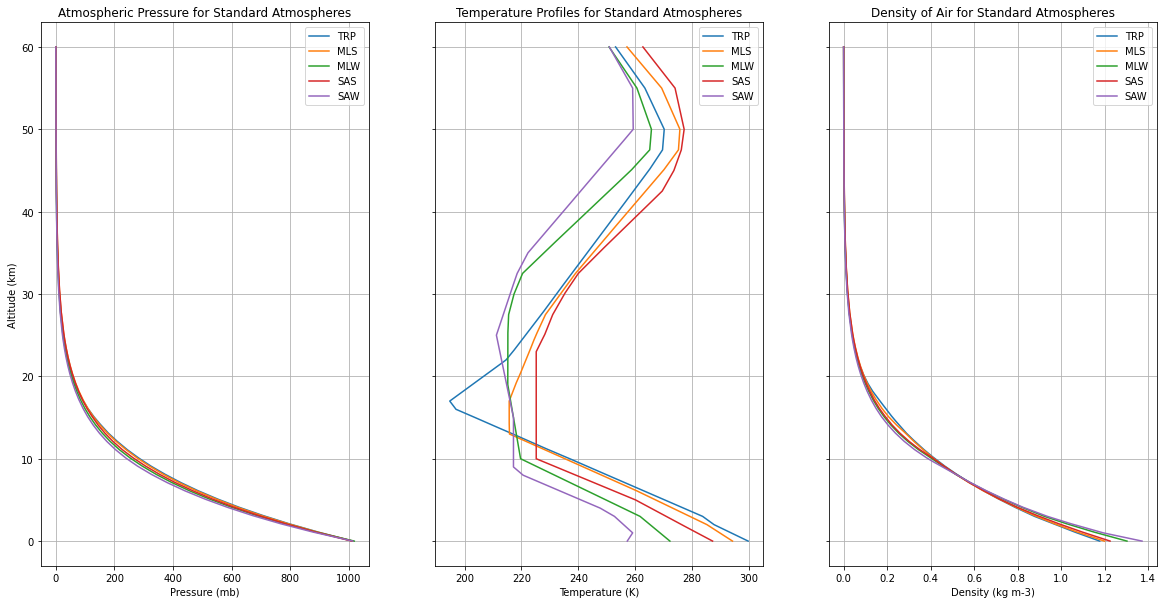

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,10), nrows=1, ncols=3, sharey=True)

# Pressure
trp.plot(ax=ax1, x='pressure', y='altitude')
mls.plot(ax=ax1, x='pressure', y='altitude')
mlw.plot(ax=ax1, x='pressure', y='altitude')
sas.plot(ax=ax1, x='pressure', y='altitude')
saw.plot(ax=ax1, x='pressure', y='altitude')
ax1.grid()
ax1.set_xlabel('Pressure (mb)');
ax1.set_ylabel('Altitude (km)');
ax1.set_title('Atmospheric Pressure for Standard Atmospheres');
ax1.legend(['TRP','MLS','MLW','SAS','SAW']);

# Temperature
trp.plot(ax=ax2, x='temperature', y='altitude')
mls.plot(ax=ax2, x='temperature', y='altitude')
mlw.plot(ax=ax2, x='temperature', y='altitude')
sas.plot(ax=ax2, x='temperature', y='altitude')
saw.plot(ax=ax2, x='temperature', y='altitude')
ax2.grid()
ax2.set_xlabel('Temperature (K)');
ax2.set_ylabel('Altitude (km)');
ax2.set_title('Temperature Profiles for Standard Atmospheres');
ax2.legend(['TRP','MLS','MLW','SAS','SAW']);

#O3
trp.plot(ax=ax3, x='airDensity', y='altitude')
mls.plot(ax=ax3, x='airDensity', y='altitude')
mlw.plot(ax=ax3, x='airDensity', y='altitude')
sas.plot(ax=ax3, x='airDensity', y='altitude')
saw.plot(ax=ax3, x='airDensity', y='altitude')
ax3.grid()
ax3.set_xlabel('Density (kg m-3)');
ax3.set_ylabel('Altitude (km)');
ax3.set_title('Density of Air for Standard Atmospheres');
ax3.legend(['TRP','MLS','MLW','SAS','SAW']);

### Primary Greenhouse Gas Concentrations in Standard Atmospheres

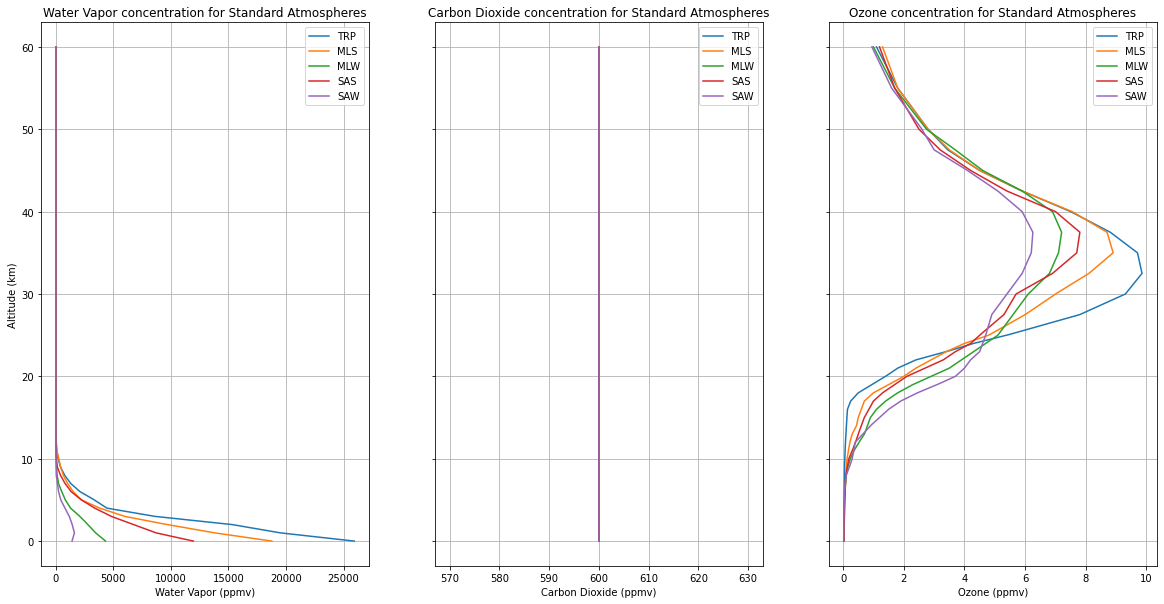

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,10), nrows=1, ncols=3, sharey=True)

# H2O
trp.plot(ax=ax1, x='h2o', y='altitude')
mls.plot(ax=ax1, x='h2o', y='altitude')
mlw.plot(ax=ax1, x='h2o', y='altitude')
sas.plot(ax=ax1, x='h2o', y='altitude')
saw.plot(ax=ax1, x='h2o', y='altitude')
ax1.grid()
ax1.set_xlabel('Water Vapor (ppmv)');
ax1.set_ylabel('Altitude (km)');
ax1.set_title('Water Vapor concentration for Standard Atmospheres');
ax1.legend(['TRP','MLS','MLW','SAS','SAW']);

# CO2
trp.plot(ax=ax2, x='co2', y='altitude')
mls.plot(ax=ax2, x='co2', y='altitude')
mlw.plot(ax=ax2, x='co2', y='altitude')
sas.plot(ax=ax2, x='co2', y='altitude')
saw.plot(ax=ax2, x='co2', y='altitude')
ax2.grid()
ax2.set_xlabel('Carbon Dioxide (ppmv)');
ax2.set_ylabel('Altitude (km)');
ax2.set_title('Carbon Dioxide concentration for Standard Atmospheres');
ax2.legend(['TRP','MLS','MLW','SAS','SAW']);

#O3
trp.plot(ax=ax3, x='o3', y='altitude')
mls.plot(ax=ax3, x='o3', y='altitude')
mlw.plot(ax=ax3, x='o3', y='altitude')
sas.plot(ax=ax3, x='o3', y='altitude')
saw.plot(ax=ax3, x='o3', y='altitude')
ax3.grid()
ax3.set_xlabel('Ozone (ppmv)');
ax3.set_ylabel('Altitude (km)');
ax3.set_title('Ozone concentration for Standard Atmospheres');
ax3.legend(['TRP','MLS','MLW','SAS','SAW']);

## Calculating Optical Depth

Now that we have values for the number density of air and the concentrations of greenhouse gases, it is easy to calculate the optical depth. We will first use absorption cross sections for carbon dioxide at the following wavelengths:

|Type of Absorption|Wavenumber ($cm^{-1}$)|Wavelength ($\mu$m)| $\kappa_a$ ($m^2 kg^{-1}$) |
| ---------------- | -------------------- | ----------------- | -------------------------- |
| Very Strong      | 667                  | 15.2              | 9000                       |
| Strong           | 600                  | 16.7              |  100                       |
| Moderate         | 590                  | 16.9              |    1                       |
| Weak             | 500                  | 20.0              |    0.01                    |

The absorption cross section values were approximated from Pierrehumbert, Physics Today, January 2011. Also, note that, for example, "5 x 10^{-23}" is 5 times 10 to the -23 power.

So, the optical depth can now be calculated for each layer of the atmosphere by multiplying the absorption cross sections ($k_a$) by the number density, and then by the thickness of the atmospheric layer, as shown in the code below (for the Mid-latitude Winter Standard Atmosphere - MLW).

In [8]:
Ka_15_2 = 9000
Ka_16_7 = 100
Ka_16_9 = 1
Ka_20_0 = 0.01

rhoCO2 = mlw.airDensity[:-1] * mlw.co2[:-1]/1e6               # Convert from ppmv to percent fraction
dz   = np.diff(mlw.altitude) * 1000       # Calculate the height of each layer by differencing levels, and convert from km to m

# Calculate and plot the optical depth at 14.6 um for CO2 for the MLW Standard Atmosphere.
mlw['od_15_2'] = Ka_15_2 * rhoCO2 * dz
mlw['od_16_7'] = Ka_16_7 * rhoCO2 * dz
mlw['od_16_9'] = Ka_16_9 * rhoCO2 * dz
mlw['od_20_0'] = Ka_20_0 * rhoCO2 * dz


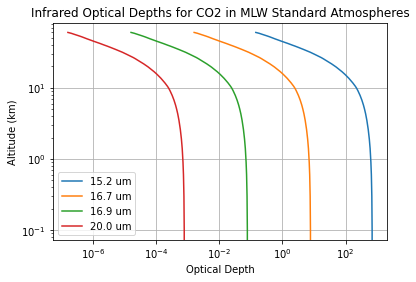

In [9]:
fig, ax = plt.subplots()

mlw.plot(ax=ax, x='od_15_2', y='altitude', logx=True, logy=True)
mlw.plot(ax=ax, x='od_16_7', y='altitude', logx=True, logy=True)
mlw.plot(ax=ax, x='od_16_9', y='altitude', logx=True, logy=True)
mlw.plot(ax=ax, x='od_20_0', y='altitude', logx=True, logy=True)
ax.grid()
ax.set_xlabel('Optical Depth');
ax.set_ylabel('Altitude (km)');
ax.set_title('Infrared Optical Depths for CO2 in MLW Standard Atmospheres');
ax.legend(['15.2 um','16.7 um','16.9 um','20.0 um']);

## Calculating Atmospheric Transmission

In [10]:
mlw['T_15_2'] = np.exp(-mlw.od_15_2) * 100
mlw['T_16_7'] = np.exp(-mlw.od_16_7) * 100
mlw['T_16_9'] = np.exp(-mlw.od_16_9) * 100
mlw['T_20_0'] = np.exp(-mlw.od_20_0) * 100

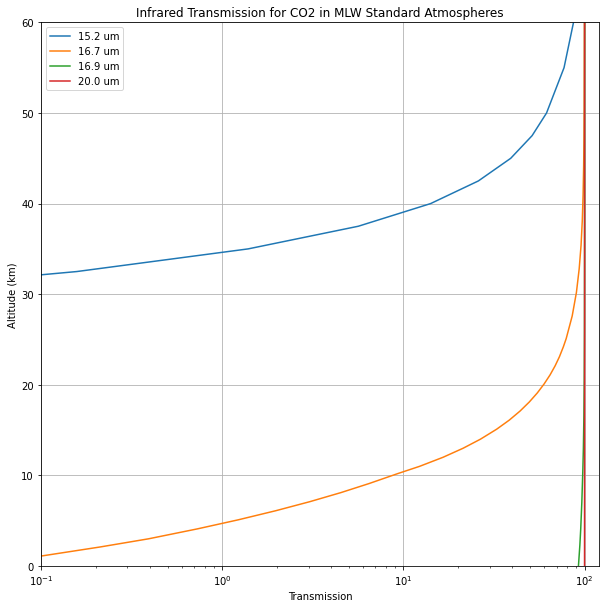

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

mlw.plot(ax=ax, x='T_15_2', y='altitude', logx=True)
mlw.plot(ax=ax, x='T_16_7', y='altitude', logx=True)
mlw.plot(ax=ax, x='T_16_9', y='altitude', logx=True)
mlw.plot(ax=ax, x='T_20_0', y='altitude', logx=True)
ax.axis([0.1, 120, 0, 60])
ax.grid()
ax.set_xlabel('Transmission');
ax.set_ylabel('Altitude (km)');
ax.set_title('Infrared Transmission for CO2 in MLW Standard Atmospheres');
ax.legend(['15.2 um','16.7 um','16.9 um','20.0 um']);

## Calculating Atmospheric Absorption (= Emissivity)

In [12]:
mlw['A_15_2'] = (1. - np.exp(-mlw.od_15_2)) * 100        # Convert from fraction to percent
mlw['A_16_7'] = (1. - np.exp(-mlw.od_16_7)) * 100
mlw['A_16_9'] = (1. - np.exp(-mlw.od_16_9)) * 100
mlw['A_20_0'] = (1. - np.exp(-mlw.od_20_0)) * 100

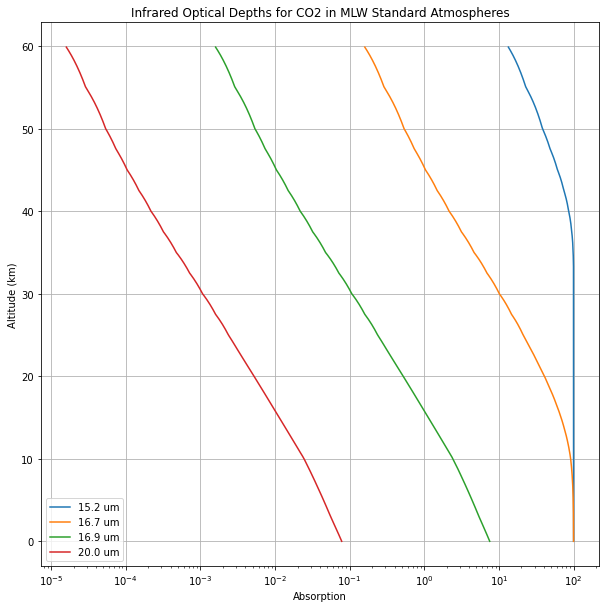

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

mlw.plot(ax=ax, x='A_15_2', y='altitude', logx=True)
mlw.plot(ax=ax, x='A_16_7', y='altitude', logx=True)
mlw.plot(ax=ax, x='A_16_9', y='altitude', logx=True)
mlw.plot(ax=ax, x='A_20_0', y='altitude', logx=True)
ax.grid()
ax.set_xlabel('Absorption');
ax.set_ylabel('Altitude (km)');
ax.set_title('Infrared Optical Depths for CO2 in MLW Standard Atmospheres');
ax.legend(['15.2 um','16.7 um','16.9 um','20.0 um']);